In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import os as os
import nrrd as reader
#from sklearn.preprocessing import Normalizer
import cv2  


In [2]:
def join(one, two):
    return os.path.join(one, two)

In [3]:
def check_path(path):
    count=0
    for files in sorted(os.listdir(path)):
        image_path = os.path.join(path,files)
        count+=1
    return count

In [4]:
# (patient count* 15) check_path function will return total patient count 
folder_path = join(os.getcwd(), "Incoming Annotations")
test_path = join(os.getcwd(),"Test")
length = check_path(folder_path)
inputs = np.zeros((length*15,256,256, 1))
outputs = np.zeros((length*15,256,256 , 9))
tests = np.zeros((100*15,256,256,1))

In [5]:
#loading test path 
def load_folder_path(path):
    global test_count
    try:
        for dirpath, dirnames, filenames in sorted(os.walk(path)):
            if (dirpath.count("/")==6):
                slice_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(dirpath)
                image = sitk.ReadImage(slice_filenames)
                for x in range(15):
                    current_slice = image[:, :, x]
                    current_array = sitk.GetArrayFromImage(current_slice)
                    split_array = current_array[:,:-256]
                    tests[test_count] = split_array[:, :, np.newaxis]
                    test_count+=1
                print(test_count)
    except Exception as e:
        print(e)
        print(dirpath)

In [6]:
#Inhomogeneity Correction
def correct_roi(image):
    inputImage=sitk.GetImageFromArray(image)
    inputImage = sitk.Cast(inputImage, sitk.sitkFloat32 )
    corrector = sitk.N4BiasFieldCorrectionImageFilter()
    output = corrector.Execute( inputImage)
    image_c= sitk.GetArrayFromImage(output)
    image_c=cv2.normalize(src=image_c, dst=None, alpha=0.0, beta=255.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) #need to normalize, not direct conversion by "np.uint8"
    return image_c

In [7]:
def dcm_to_np(path):
    global dic_count
    try:
        slice_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(path)
        image = sitk.ReadImage(slice_filenames)
        for x in range(15):
            current_slice = image[:, :, x]
            current_array = sitk.GetArrayFromImage(current_slice)
            split_array = current_array[:,:-256]
            inputs[dic_count] = split_array[:, :, np.newaxis]
            dic_count+=1
        print(dic_count)
    except Exception as e:
        print(e)
#         print("Problem with this folder -> " + path)

In [8]:
def nrrd_to_np(meta_object):
    global ann_count
    try:
        data = sitk.GetArrayFromImage(meta_object)
        for p in range(15):
            current_seg = data[p, :, :]
            half_seg= current_seg[:,:-256]
            black = np.zeros([256, 256, 9])
            for y, a in enumerate(half_seg):
                for x, b in enumerate(a):
                    if b>0:
                        black[y][x][b-1] = 1
            outputs[ann_count] = black
            ann_count+=1
        print(ann_count)
    except Exception as e:
        print(e)

In [9]:
dic_count = 0
ann_count = 0
test_count= 0
try:
    for patient in sorted(os.listdir(folder_path)):
            patient_path = join(folder_path, patient)
            nrrd_folder = join(patient_path, "NRRD")
            dcm_to_np(patient_path)
            for nrrd in os.listdir(nrrd_folder):
                if(".nrrd" in nrrd):
                    segmentation = sitk.ReadImage(join(nrrd_folder, nrrd))
                    nrrd_to_np(segmentation)
except Exception as e:
    print(e)
load_test(test_path)

15
15
30
30
45
45
60
60
75
75
90
90
105
105
120
120
135
135
150
150
165
165
180
180
195
195
210
210
225
225
240
240
255
255
270
270
285
285
300
300
315
315
330
330
345
345
360
360
375
375
390
390
405
405
420
420
435
435
450
450
465
465
480
480
495
495
510
510
525
525
540
540
555
555
570
570
585
585
600
600
615
615
630
630
645
645
660
660
675
675
690
690
705
705
720
720
735
735
750
750
765
765
780
780
795
795
810
810
825
825
840
840
855
855
870
870
885
885
900
900
915
915
930
930
945
945
960
960
975
975
990
990
1005
1005
1020
1020
1035
1035
1050
1050
1065
1065
1080
1080
1095
1095
1110
1110
1125
1125
1140
1140
1155
1155
1170
1170
1185
1185
1200
1200
1215
1215
1230
1230
1245
1245
1260
1260
1275
1275
1290
1290
1305
1305
1320
1320
1335
1335
1350
1350
1365
1365
1380
1380
1395
1395
1410
1410
1425
1425
1440
1440
1455
1455
1470
1470
1485
1485
1500
1500
1515
1515
1530
1530
1545
1545
1560
1560
1575
1575
1590
1590
1605
1605
1620
1620
1635
1635
1650
1650
1665
1665
1680
1680
1695
1695
1710
1710
1725

NameError: name 'load_test' is not defined

In [8]:
# Normalization with sklearn 
# for x in range (1754):    
#     temp = inputs[x].reshape(256, 256)
#     transformer = Normalizer().fit(temp)
#     temp1 = transformer.transform(temp)
#     inputs[x]=temp1[:, :, np.newaxis]

In [10]:
#opencv + numpy normalization 
for x in range (1754):    
    temp = inputs[x].reshape(256, 256)
    temp1= correct_roi(temp)
    np.linalg.norm(temp1)
    inputs[x]=temp1[:, :, np.newaxis]
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

SystemError: <built-in function N4BiasFieldCorrectionImageFilter_Execute> returned a result with an error set

In [11]:
temp = inputs[1].reshape(256,256)
temp.max()


255.0

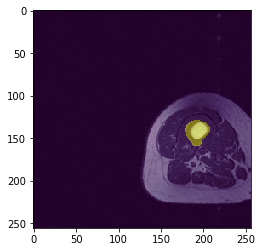

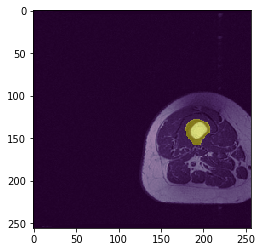

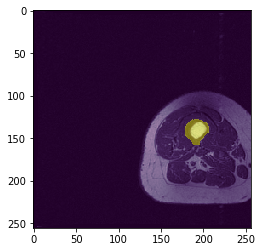

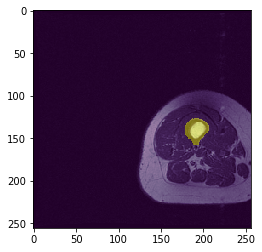

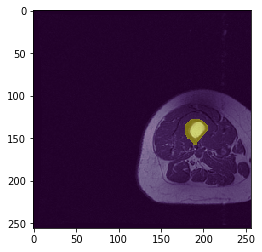

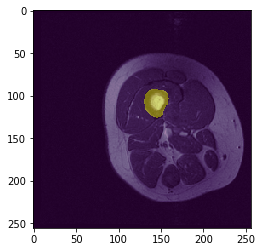

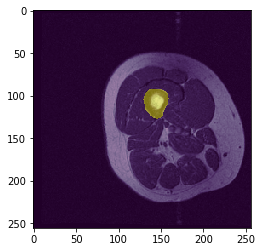

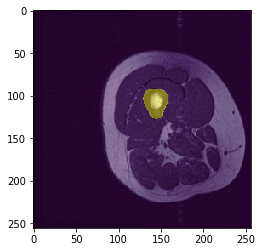

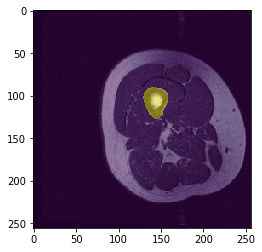

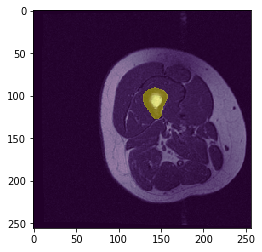

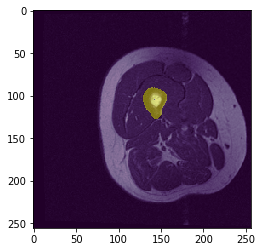

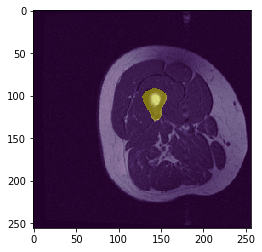

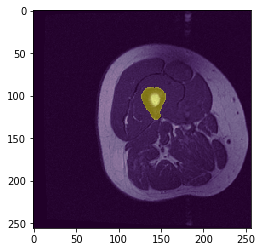

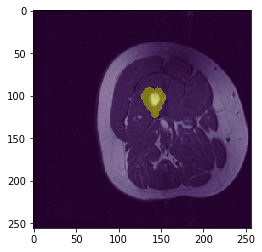

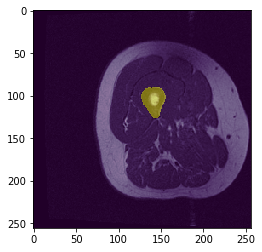

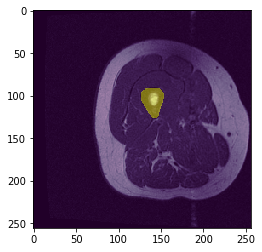

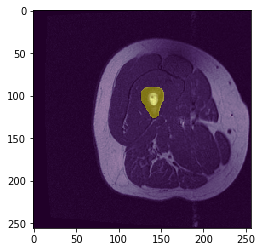

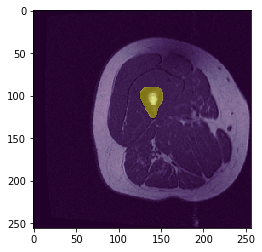

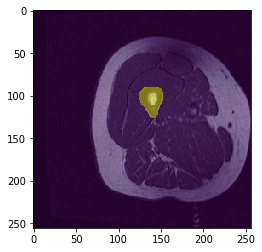

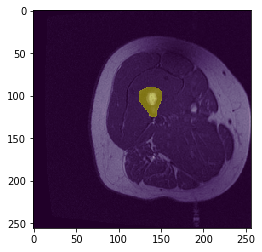

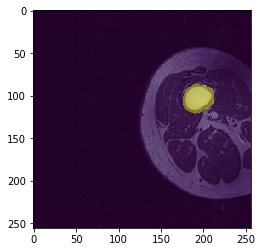

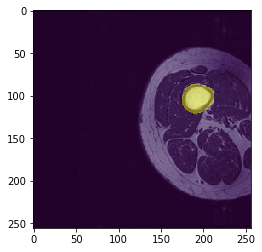

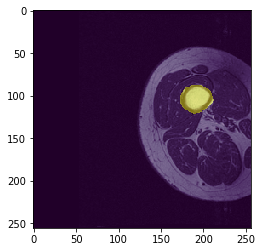

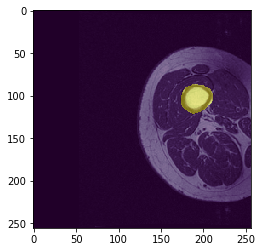

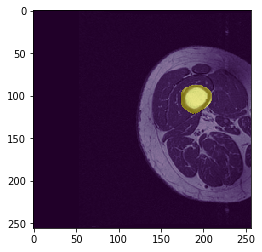

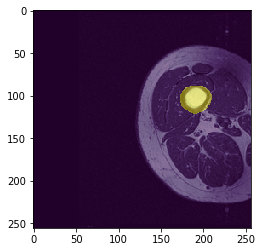

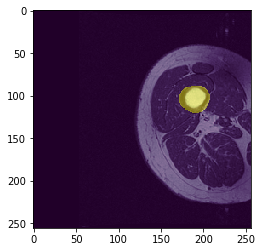

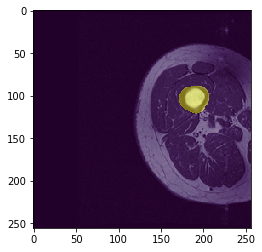

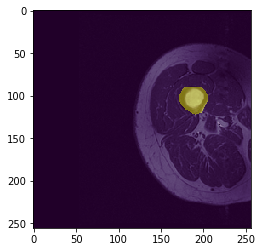

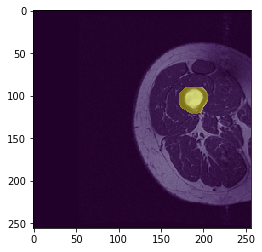

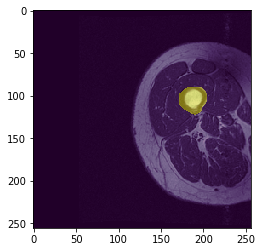

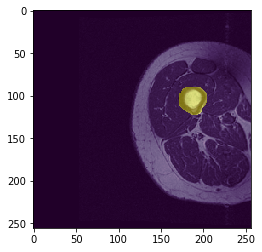

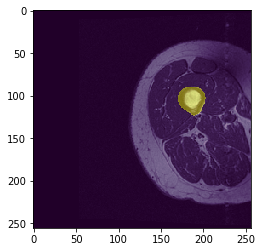

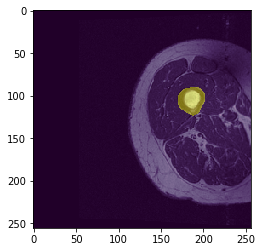

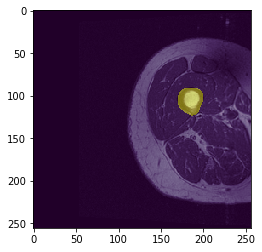

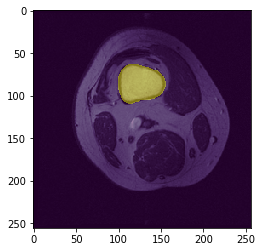

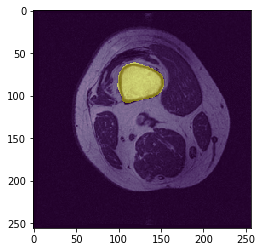

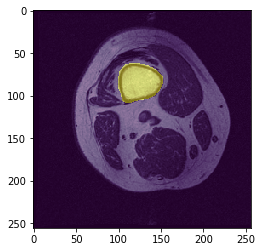

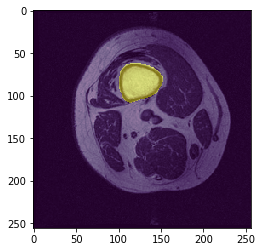

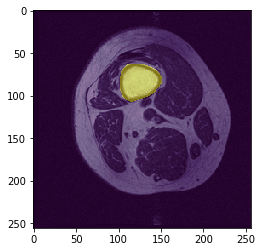

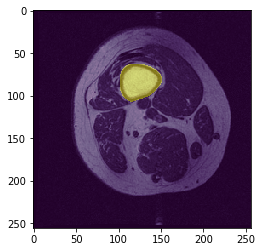

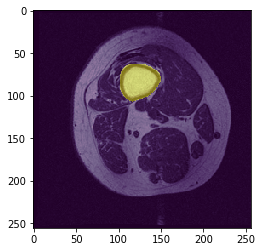

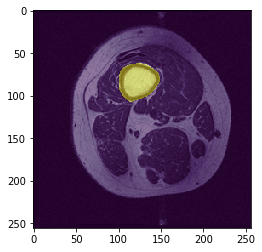

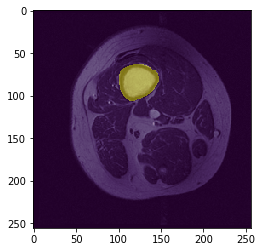

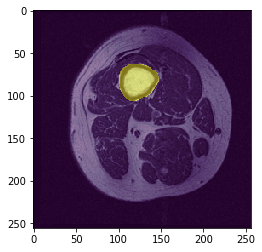

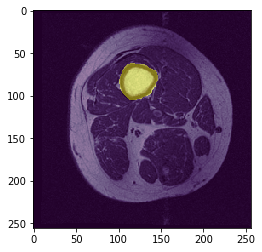

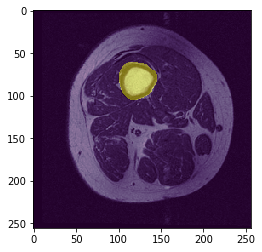

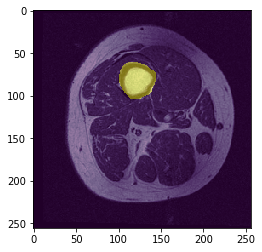

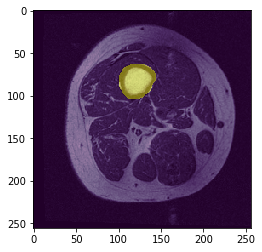

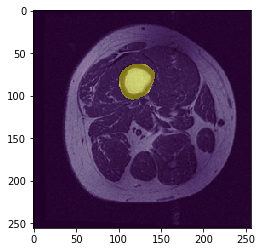

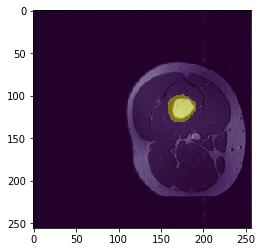

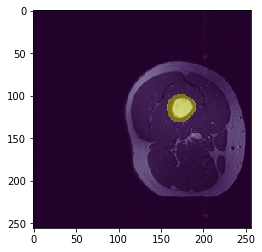

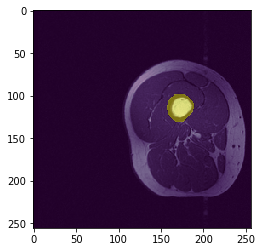

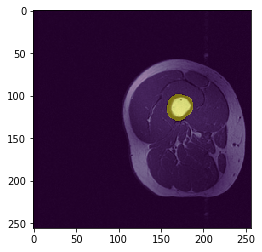

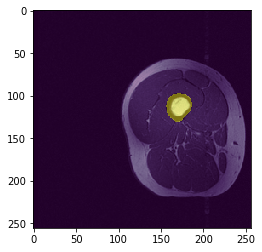

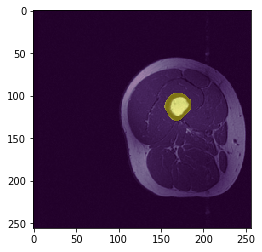

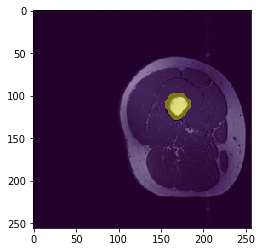

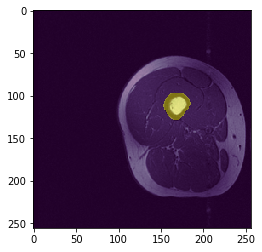

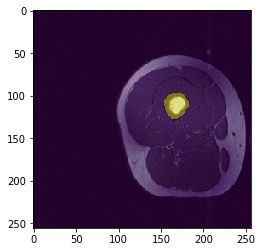

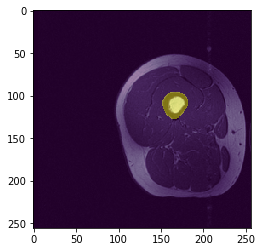

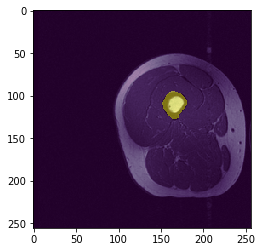

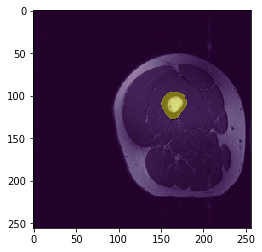

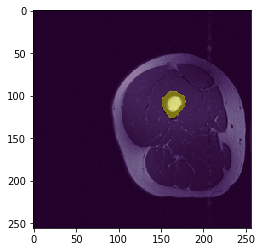

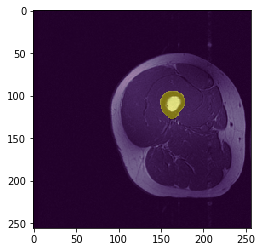

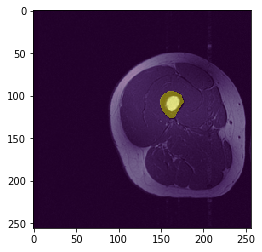

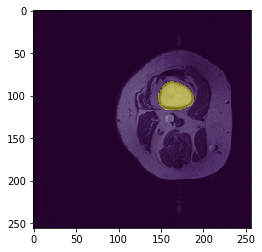

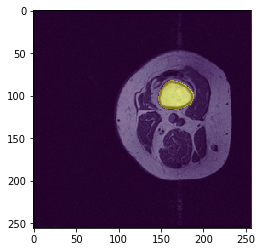

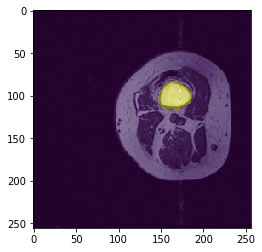

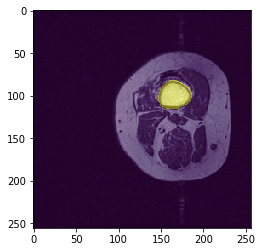

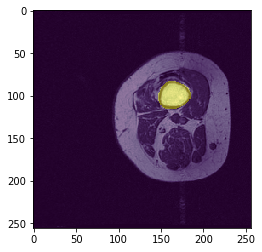

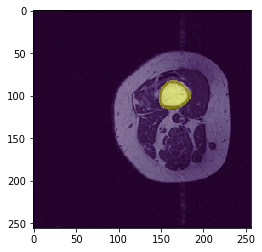

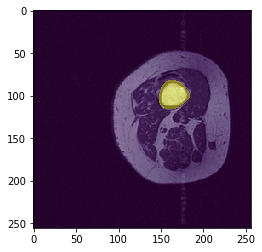

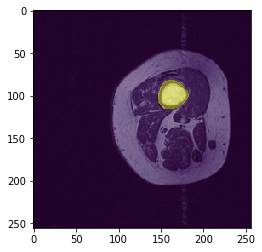

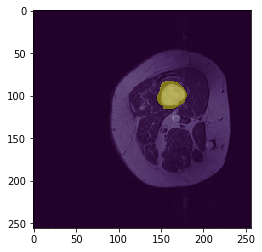

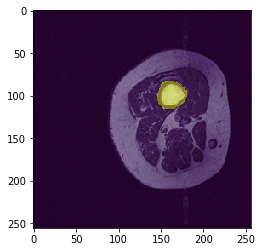

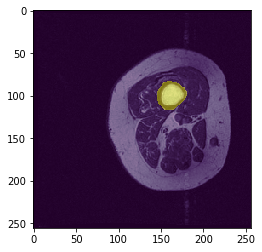

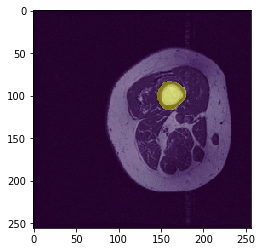

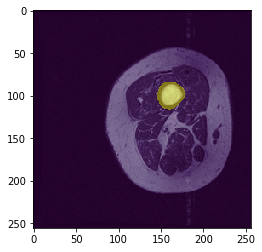

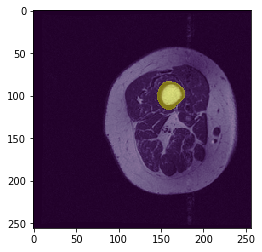

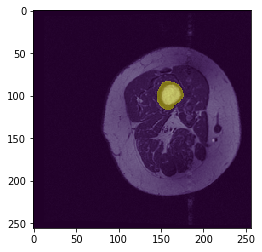

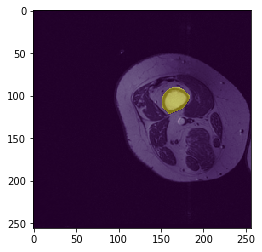

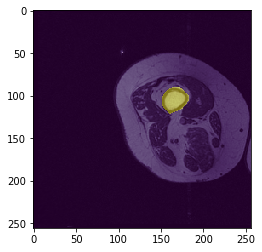

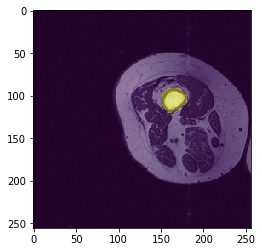

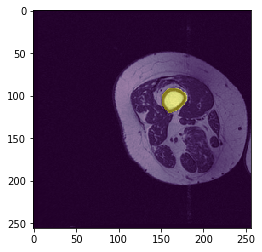

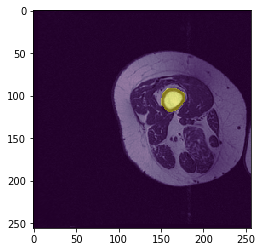

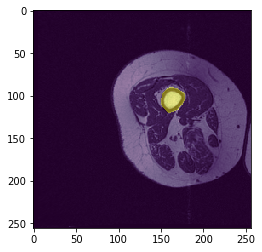

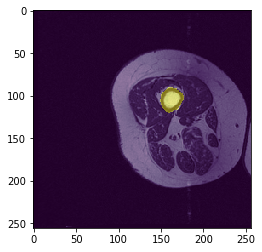

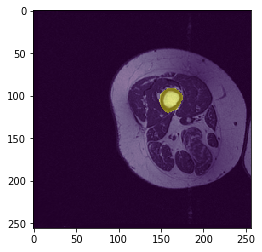

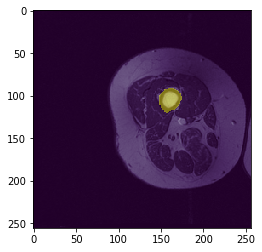

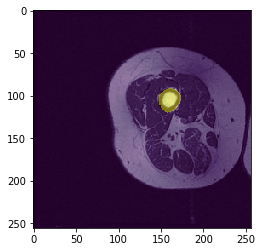

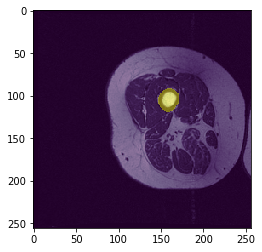

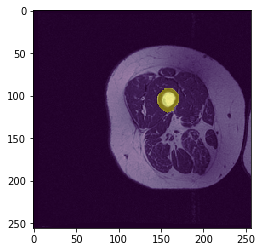

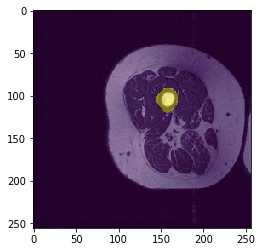

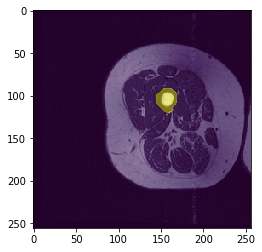

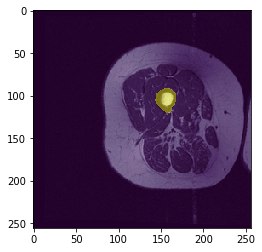

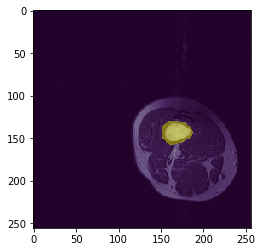

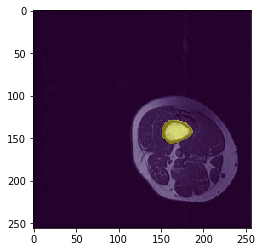

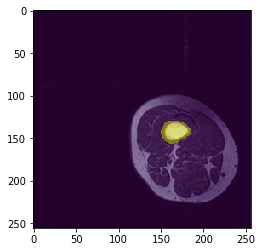

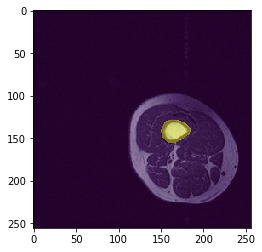

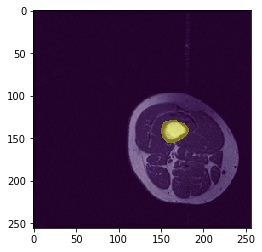

In [15]:
for i in range(160, 1700):
    plt.imshow(inputs[i].reshape(256, 256), cmap=plt.cm.bone)
    plt.imshow(outputs[i][:, :, 2], alpha=0.5)
    plt.show()

In [14]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

def unet_model(im_height, im_width, im_chan):

    input_img = Input((im_height, im_width, im_chan,), name='img')

    inp = BatchNormalization()(input_img)

    c1 = Conv2D(4, (3, 3), activation='relu', padding='same') (inp)
    a1 = MaxPooling2D((2, 2))(c1)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(4, (3, 3), activation='relu', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    cat1 = concatenate([p1, a1])

    c2 = Conv2D(8, (3, 3), activation='relu', padding='same') (cat1)
    a2 = MaxPooling2D((2, 2))(c2)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(8, (3, 3), activation='relu', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    cat2 = concatenate([p2, a2])

    c3 = Conv2D(16, (3, 3), activation='relu', padding='same') (cat2)
    a3 = MaxPooling2D((2, 2))(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(16, (3, 3), activation='relu', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    cat3 = concatenate([p3, a3])

    c4 = Conv2D(32, (3, 3), activation='relu', padding='same') (cat3)
    a4 = MaxPooling2D((2, 2))(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(32, (3, 3), activation='relu', padding='same') (c4)
    p4 = MaxPooling2D((2, 2)) (c4)

    cat4 = concatenate([p4, a4])

    c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (cat4)
    a5 = MaxPooling2D((2, 2))(c5)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
    p5 = MaxPooling2D((2, 2)) (c5)

    cat5 = concatenate([p5, a5])

    c6 = Conv2D(128, (3, 3), activation='relu', padding='same') (cat5)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c5])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same') (u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same') (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c4])
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same') (u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c3])
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same') (u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same') (c9)

    u10 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c9)
    u10 = concatenate([u10, c2])
    c10 = Conv2D(8, (3, 3), activation='relu', padding='same') (u10)
    c10 = Dropout(0.2)(c10)
    c10 = Conv2D(8, (3, 3), activation='relu', padding='same') (c10)

    u11 = Conv2DTranspose(4, (2, 2), strides=(2, 2), padding='same') (c10)
    u11 = concatenate([u11, c1], axis = 3)
    c11 = Conv2D(4, (3, 3), activation='relu', padding='same') (u11)
    c11 = Dropout(0.2)(c11)
    c11 = Conv2D(4, (3, 3), activation='relu', padding='same') (c11)

    outputs = Conv2D(9, (1, 1), activation='softmax') (c11)

    model = Model(inputs=[input_img], outputs=[outputs])

    return model
model = unet_model(256, 256, 1)
model.summary()

/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 1)  4           img[0][0]                        
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 4)  40          batch_normalization[0][0]        
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 4)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (

In [16]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
results = model.fit(x=inputs, y=outputs, epochs=60, batch_size=8)

Epoch 1/60


InternalError: GPU sync failed

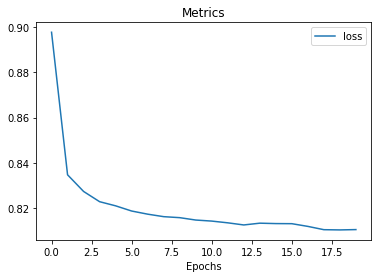

In [15]:
plt.title("Metrics")
plt.plot(results.history["loss"], label="loss")
plt.xlabel("Epochs")
plt.legend()

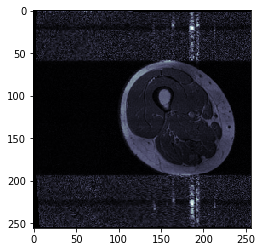

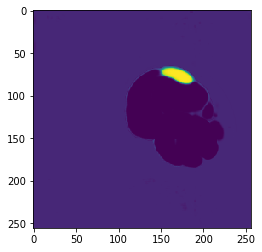

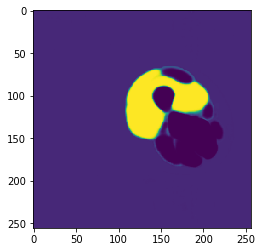

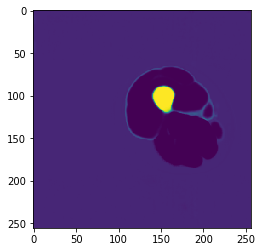

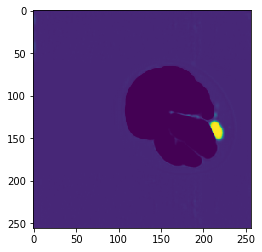

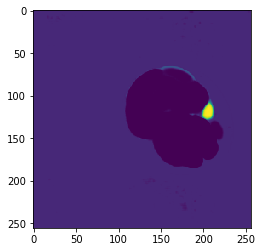

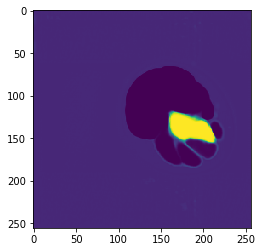

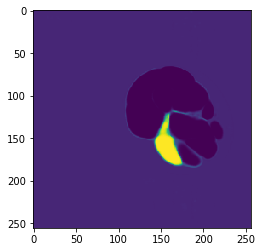

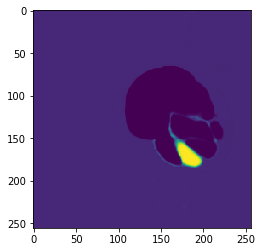

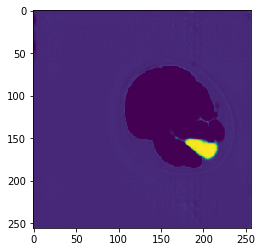

In [20]:
result = model.predict(inputs[100].reshape(1, 256, 256, 1))
plt.imshow(inputs[100].reshape(256, 256), cmap=plt.cm.bone)
plt.show()
for x in range(9):
    plt.imshow(result[0][:, :, x])
    plt.show()